In [1]:
import os
import yaml
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle
from collections import Counter
from glob import glob
from pprint import pprint
from tqdm import tqdm

from mejiro.utils import util

# read configuration file
import mejiro
config_file = os.path.join(os.path.dirname(mejiro.__file__), 'data', 'mejiro_config', 'jwst.yaml')
with open(config_file, 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [2]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '02')

pickles = sorted(glob(os.path.join(data_dir, '*.pkl')))
lenses = [util.unpickle(f) for f in pickles]
print(f'Found {len(lenses)} system(s) in {data_dir}')

Found 845 system(s) in /data/bwedig/mejiro/jwst_dev/02


In [3]:
galaxy_ids = [l.physical_params.get('galaxy_id') for l in lenses]
repeat_list = []

counts = Counter(galaxy_ids)
for galaxy_id, count in counts.items():
    # print(f'galaxy_id {galaxy_id} appears {count} times')
    repeat_list.append(count)

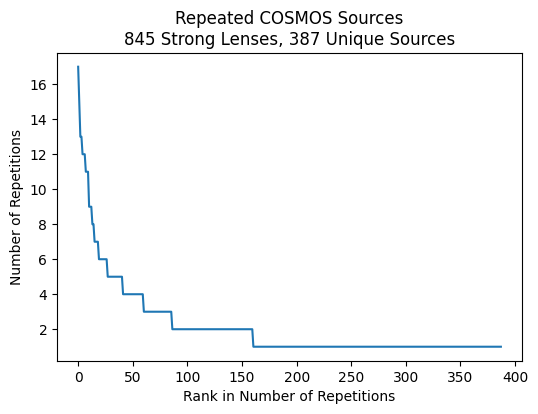

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0, len(repeat_list), len(repeat_list)), sorted(repeat_list, reverse=True))
plt.title(f'Repeated COSMOS Sources\n{len(galaxy_ids)} Strong Lenses, {len(repeat_list)} Unique Sources')
plt.xlabel('Rank in Number of Repetitions')
plt.ylabel('Number of Repetitions')
plt.show()

In [5]:
pickle_output_dir = '/data/bwedig/mejiro/jwst_dev/pickles'
util.clear_directory(pickle_output_dir)

In [6]:
for l in tqdm(lenses):
    lens_json = {
        'kwargs_model': l.kwargs_model,
        'physical_params': l.physical_params,
        'kwargs_params': l.kwargs_params
    }

    pkl_fname = os.path.join(pickle_output_dir, f'{l.name}.pkl')
    with open(pkl_fname, 'wb') as pf:
        pickle.dump(lens_json, pf, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 845/845 [00:00<00:00, 1675.95it/s]
